<a href="https://colab.research.google.com/github/BistonN/BistonN.github.io/blob/master/Estudo_Machine_Leaning_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho de machine leaning
- Davi Dutra
- João V. Biston Nunes

---


### Introdução

Este trabalho tem como objetivo avaliar a capacidade de classificação de pessoas com diabetes dos Algoritimos SVM e KNN com base nos dados: número de gravidezes,	nivel de glicose,	pressão sanguínea,	espessura da pele, nivel de insulina,	IMC,	função de linhagem de diabetes e idade.





In [ ]:
# Importa as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:

# Importa o dataset
dataset = pd.read_csv('/content/diabetes.csv')

# Visualizar os 5 primeiros registros
dataset.head()

,Gravidezes,Glicose,Pressão sanguínea,\nEspessura da Pele,Insulina,IMC,Função de Linhagem de Diabetes,Idade,Resultado
0,6,148,72,35,0,33.6,627.0,50,1
1,1,85,66,29,0,26.6,351.0,31,0
2,8,183,64,0,0,23.3,672.0,32,1
3,1,89,66,23,94,28.1,167.0,21,0
4,0,137,40,35,168,43.1,2288.0,33,1


In [ ]:
# Informações sobre os tipos de dados em cada coluna
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gravidezes                      768 non-null    int64  
 1   Glicose                         768 non-null    int64  
 2   Pressão sanguínea               768 non-null    int64  
 3   
Espessura da Pele              768 non-null    int64  
 4   Insulina                        768 non-null    int64  
 5   IMC                             768 non-null    float64
 6   Função de Linhagem de Diabetes  768 non-null    float64
 7   Idade                           768 non-null    int64  
 8   Resultado                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Setar uma lista com os nomes das colunas e o DataFrame
feature_names = []

for col in dataset.columns:
  feature_names.append(col)

df = pd.DataFrame(data=dataset, columns=feature_names)

In [ ]:
# Informações básicas dos dados em cada coluna
df.describe()

,Gravidezes,Glicose,Pressão sanguínea,\nEspessura da Pele,Insulina,IMC,Função de Linhagem de Diabetes,Idade,Resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,428.235091,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,340.485655,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,205.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,337.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,591.500000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2329.000000,81.000000,1.000000


É possível ver que algumas colunas possuem o valor 0, e que esse valor não corresponde ao valor esperado na coluna. Então é precisa realizar um pré-processamento no dataset.

In [ ]:
# Define um valor padrão para os valores 0
df[['Glicose','Pressão sanguínea','\nEspessura da Pele','Insulina','IMC']] = df[['Glicose','Pressão sanguínea','\nEspessura da Pele','Insulina','IMC']].replace(0, np.NaN)
# Substitui o valor pela média da coluna
df['Glicose'].fillna(df['Glicose'].mean(), inplace = True)
df['Pressão sanguínea'].fillna(df['Pressão sanguínea'].mean(), inplace = True)
df['\nEspessura da Pele'].fillna(df['\nEspessura da Pele'].median(), inplace = True)
df['Insulina'].fillna(df['Insulina'].median(), inplace = True)
df['IMC'].fillna(df['IMC'].median(), inplace = True)

In [ ]:
# Ajusta o normalizador
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Resultado', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# Normaliza os atributos
scaled_features = scaler.transform(df.drop('Resultado', axis=1))
df_ft = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_ft.head()

,Gravidezes,Glicose,Pressão sanguínea,\nEspessura da Pele,Insulina,IMC,Função de Linhagem de Diabetes,Idade
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.584149,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.226986,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.716400,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.767743,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.465654,-0.020496


Agora com os dados já normalizados, plotamos graficos que cruza dois atributos para realizar uma análize inicial 

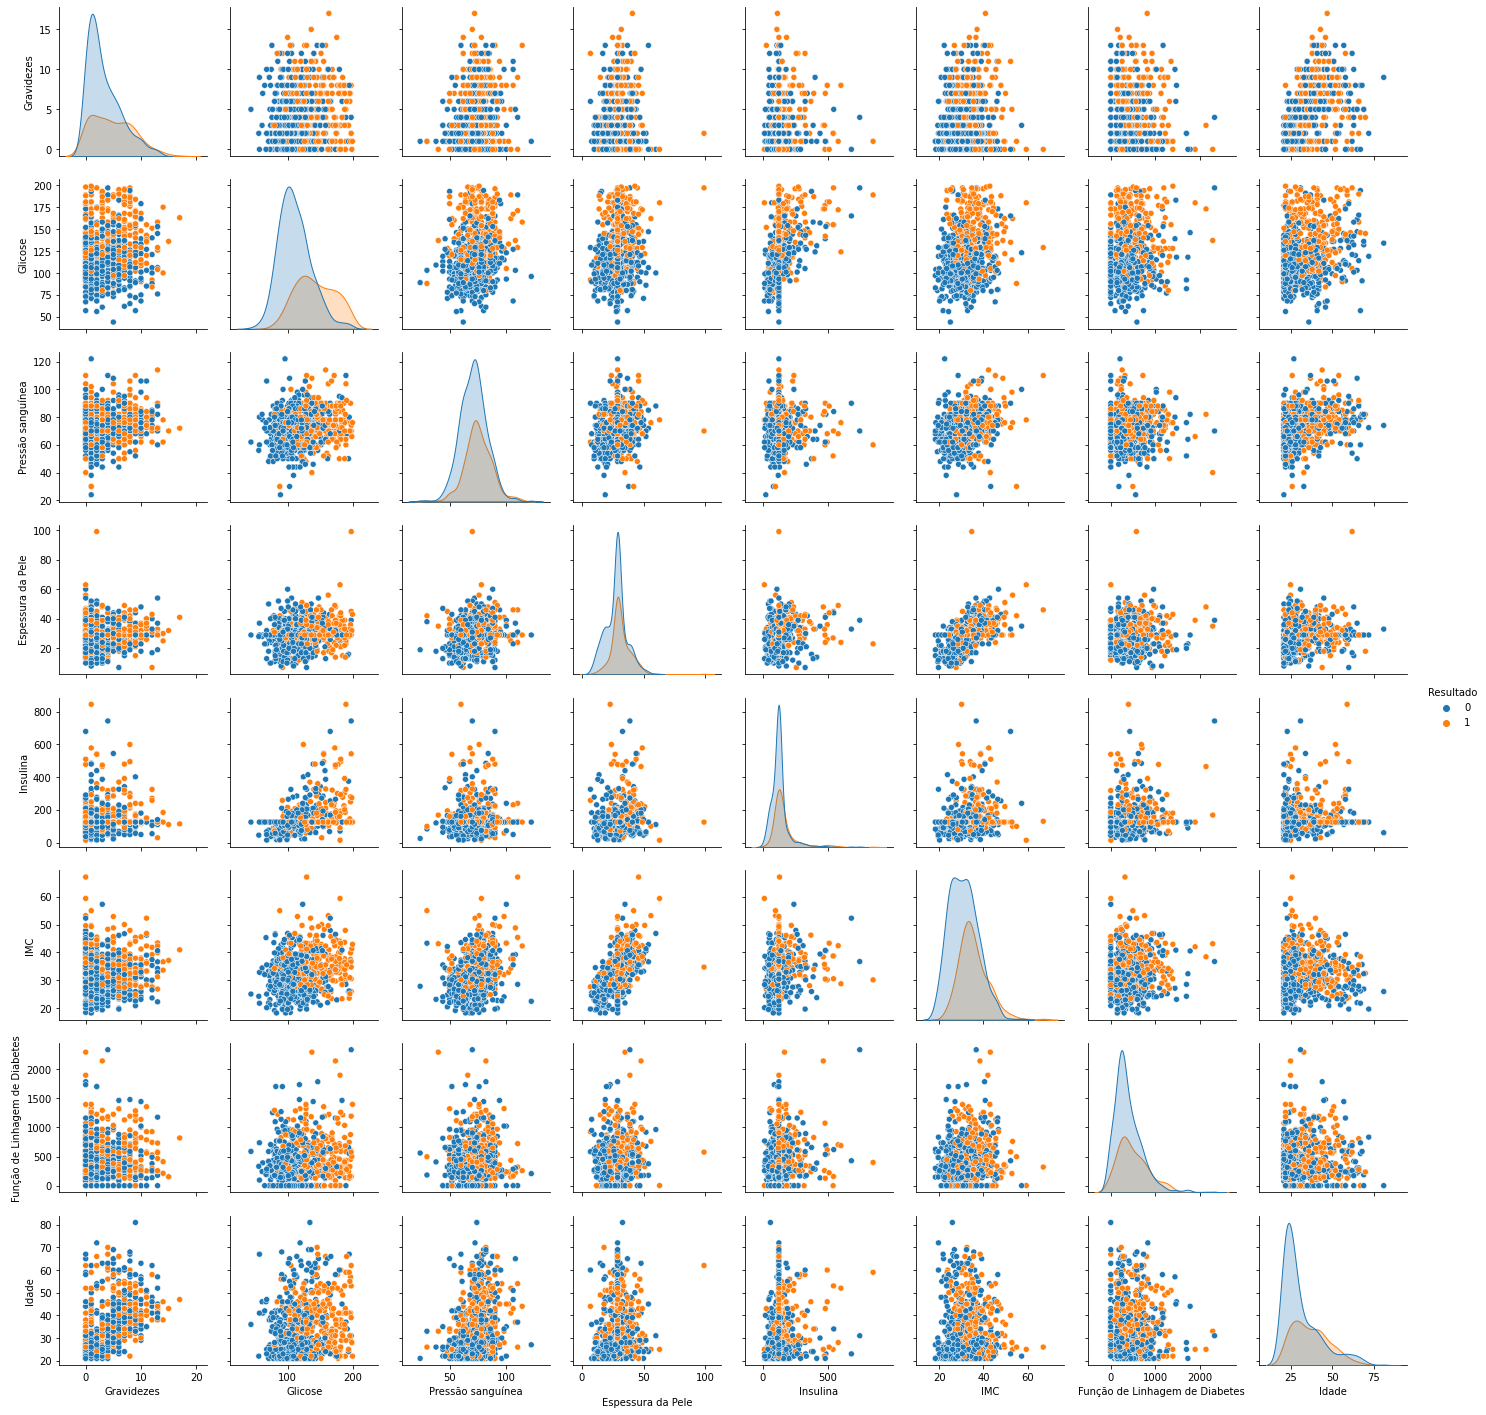

In [ ]:
sns.pairplot(df[feature_names], hue=feature_names[-1])

Com base nesses dados é possivel analizar inicialmente se os algoritimos serão eficases. 
No caso do SVM observamos que provavelmente o algoritimo nao consiguirá separar os dados de forma linear, 
então optamos por realizar os testes de tres maneiras:
- Usando a função Kernel linear;
- Usando a função Kernel polinomial;
- Usando a função Kernel rbf (Radial Basis Function)

---

### Entendendo a função Kernel

SVM é um algoritmo de aprendizado supervisionado, cujo objetivo é classificar determinado conjunto de pontos de dados que são mapeados para um espaço de características por n dimensões usando uma função kernel.

Esta função é a responsavel por separar os pontos, ou seja, dependendo da função kernel, o algorítimo separa os pontos de maneiras diferentes.

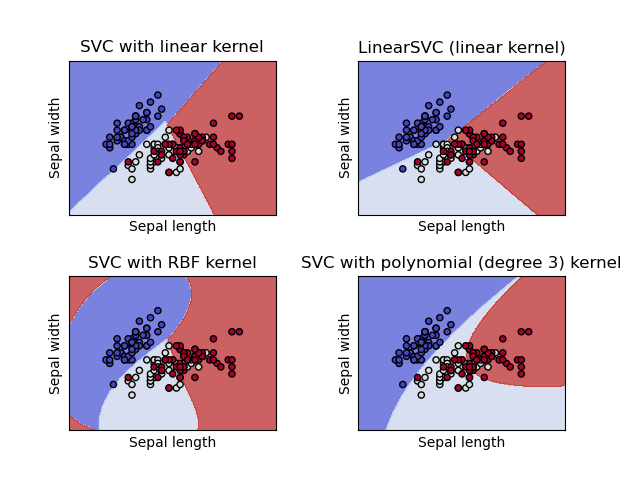

## SVM

In [ ]:
# Importação das bibliotecas relacionadas ao algoritimo
from sklearn import svm
from sklearn.model_selection import train_test_split

In [ ]:
# Separação dos dados de teste e de treinamento
X, y = scaled_features, df[feature_names[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [ ]:
# Criando tabela para comparação dos testes com o SVM
results = []
results.append(['kernel', 'gamma', 'C', 'normalized data', 'comments', 'score'])

In [ ]:
# Realizando a classificação com diferentes funções kernel
clf_rbf = svm.SVC(kernel='rbf', gamma='auto')
clf_rbf.fit(X_train, y_train)
y_pred = clf_rbf.predict(X_test)
results.append(['rbf', 'auto', '1.0', True, '', '%.2f' % clf_rbf.score(X_test,y_test)])

clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train)
y_pred = clf_linear.predict(X_test)
results.append(['linear', 'scale', '1.0', True, '','%.2f' % clf_linear.score(X_test,y_test)])

clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(X_train, y_train)
y_pred = clf_poly.predict(X_test)
results.append(['poly', 'scale', '1.0', True, '','%.2f' % clf_poly.score(X_test,y_test)])

In [ ]:
# Inserindo na tabela de results os resultados dos testes feitos com o dataset não normalizado
results.append(['poly', 'scale', '1.0', False, '', '%.2f' % 0.6493506493506493])
results.append(['rbf', 'auto', '1.0', False, '', '%.2f' % 0.5670995670995671])
results.append(['linear', 'scale', '1.0', False, '', '%.2f' % 0.7575757575757576])

In [ ]:
pd.DataFrame(data=sorted(results[1:]), columns=results[0])

,kernel,gamma,C,normalized data,comments,score
0,linear,scale,1.0,False,,0.76
1,linear,scale,1.0,True,,0.73
2,poly,scale,1.0,False,,0.65
3,poly,scale,1.0,True,,0.70
4,rbf,auto,1.0,False,,0.57
5,rbf,auto,1.0,True,,0.74


Ápos a realização dos testes, foi possivel analizar as features mais relevantes para a classificação atraves da função 'permutation_importance' disponibilizado no pacote 'inpection' do sklearn

Text(0.5, 0, 'Permutation Importance')

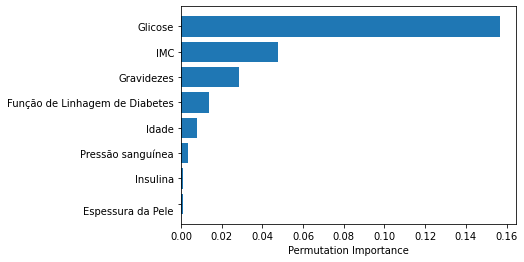

In [ ]:
# Importando pacote inpection e plotando as features mais relevantes para a classificação
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(clf_linear, X_test, y_test)
features = np.array(feature_names[0:-1])

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


Com base no gráfico acima, foi possivel observar que a Glicose é o fator mais relevante para a classificação de uma pessoa com diabetes, seguido da taxa de IMC e numero de gravidezes. E inversamente proporcional, a espesurra da pele foi o fator de menor impacto para a classificação.
A partir disso foi realizado testes com o dataset usando apenas os 3 atributos mais relevantes para averiguar se a classificação fica mais precisa.

In [ ]:
# Retirada dos atributos menos relevantes e separando dados de treinamento e validação
X, y = df[feature_names[:-1]].drop(columns=['Idade', '\nEspessura da Pele', 'Insulina', 'Pressão sanguínea', 'Função de Linhagem de Diabetes']), df[feature_names[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [ ]:
# Realizando a classificação com diferentes funções kernel e com apenas os atributos relevantes do dataset
clf_rbf = svm.SVC(kernel='rbf', gamma='auto')
clf_rbf.fit(X_train, y_train)
y_pred = clf_rbf.predict(X_test)
results.append(['rbf', 'auto', '1.0', True, 'Testes feitos penas os atributos mais relevantes', '%.2f' % clf_rbf.score(X_test,y_test)])

clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train)
y_pred = clf_linear.predict(X_test)
results.append(['linear', 'scale', '1.0', True, 'Testes feitos penas os atributos mais relevantes','%.2f' % clf_linear.score(X_test,y_test)])

clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(X_train, y_train)
y_pred = clf_poly.predict(X_test)
results.append(['poly', 'scale', '1.0', True, 'Testes feitos penas os atributos mais relevantes','%.2f' % clf_poly.score(X_test,y_test)])

In [ ]:
pd.DataFrame(data=sorted(results[1:]), columns=results[0])

,kernel,gamma,C,normalized data,comments,score
0,linear,scale,1.0,False,,0.76
1,linear,scale,1.0,True,,0.73
2,linear,scale,1.0,True,Testes feitos penas os atributos mais relevantes,0.71
3,poly,scale,1.0,False,,0.65
4,poly,scale,1.0,True,,0.70
5,poly,scale,1.0,True,Testes feitos penas os atributos mais relevantes,0.70
6,rbf,auto,1.0,False,,0.57
7,rbf,auto,1.0,True,,0.74
8,rbf,auto,1.0,True,Testes feitos penas os atributos mais relevantes,0.60


Foi possível observar que em nenhum caso, a retirada dos atribtos menos relevantes aumentou a precisão na classificação, pelo contrário, apenas diminuiu o score.
Um destaque para o teste usando a função kernel Linear, onde antes dos testes, aparentava ser a função menos indicada, mas que mesmo assim foi a função que teve o melhor resultado (mesmo com os testes feitos com o dataset não normalizado) de 0.76

---

É possivel tambem obserar a grande importancia da normalização dos dados, onde no caso dos testes feitos com as funções kernel rbf e polinominal, houve um aumento de quase 0.20 no score. Especificamente no caso da função rbf, fez com que o pior score (de 0.57) quese alcancasse o melhor score (0.74, onde o melhor score alcançado em todos os testes foi de 0.75) 

---

Após ver um avanço nos testes feitos com a função kernel rbf, foi decidido realizar mais alguns testes, porém agora alterando alguns parâmetros: 
 - Parâmetro de regularização (C): O parâmetro C é 1 por padrão na biblioteca sklearn. Caso tiver muitas observações com ruído no dataset, é indicado que diminuía. Diminuir o parâmetro C corresponde a mais regularização.

- Gamma: este parâmetro define quanta influência um único exemplo de treinamento tem. Quanto maior for o gamma, mais próximos os outros exemplos devem estar para serem afetados.

Esses dois parâmetros são essenciais para a performance do SVM. Então foi ultilizado a função GridSearchCV do skleaning que realiza uma pesquisa para encontrar os valores mais adequados.

In [ ]:
# Separação dos dados de teste e de treinamento
X, y = scaled_features, df[feature_names[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [ ]:
# Importação do GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  

param_grid = {'C': [0.1, 1, 10, 50, 80, 90, 81, 82, 83, 84, 85, 86, 87, 88, 89], 'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

grid.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.8s finished


SVC(C=90, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Resultado do melhor teste usando o GridSearchCV
'%.2f' % grid.best_estimator_.score(X_test,y_test)

'0.73'

Usando a função GridSearchCV foi possivel obter resultado praticamente iguais ao score dos testes anteriores (de 0.73), onde no melhor teste, os parametros usados foram: C = 90 e gamma=0.001 

# KNN

In [ ]:
# Divide os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['Resultado'], test_size=0.30)

In [ ]:
# Implementando o algoritmo de K-NN com K = 1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
# Realizando predição
pred = knn.predict(X_test)

In [ ]:
# Avaliando o algoritmo K-NN
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, pred)

array([[107,  43],
       [ 38,  43]])

Atravéz da matriz de confusão, é possivel ver a quantidade de acertos e erros por cada classe


In [ ]:
# Avaliando pelas métricas
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       150
           1       0.50      0.53      0.51        81

    accuracy                           0.65       231
   macro avg       0.62      0.62      0.62       231
weighted avg       0.65      0.65      0.65       231



A acurácia geral do algoritmo foi de 68%, sendo que o algoritmo possui mais fácilidade em prever os itens da classe 0 do que da classe 1

O algotimo teve uma baixa acurácia devido ao valor de K, por isso será implementado o método Elbow para obter o melhor valor de K

In [ ]:
# Implementação do método elbow
error_rate = []
# Testando vários valores de K de 1 à 100
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

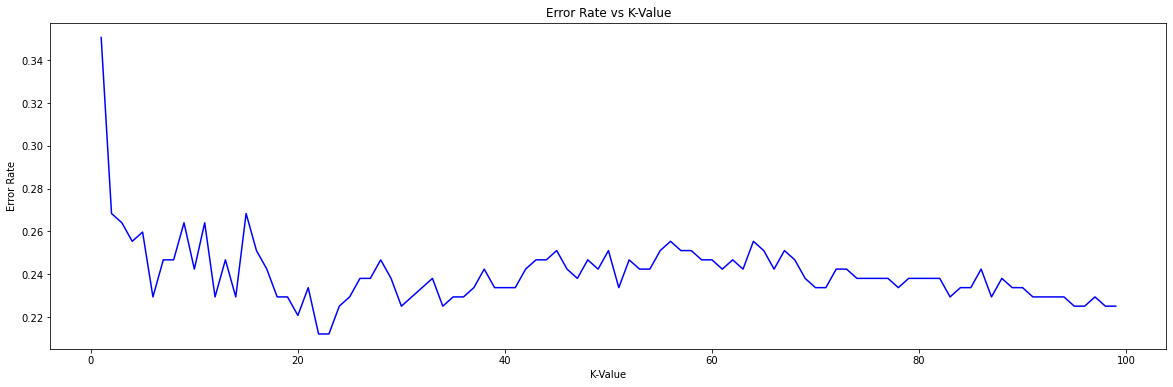

In [ ]:
# Gráfico do método Elbow
plt.figure(figsize=(20,6))
plt.plot(range(1, 100), error_rate, color='blue')
plt.title('Error Rate vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.show()

Através do gráfico, é possível estimar que o melhor valor de K é o valor 12

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train, y_train)

# Realizando predição
pred = knn.predict(X_test)

# Matriz de confusão
print(confusion_matrix(y_test, pred), end="\n\n")

# Avaliando pelas métricas
print(classification_report(y_test, pred))

[[135  15]
 [ 38  43]]

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       150
           1       0.74      0.53      0.62        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



Alterando o valor de K para 14, é possivel notar que a acurácia aumentou para 81%